<a href="https://colab.research.google.com/github/Rabidgeek/mua/blob/main/MarleysUmbrellaAcademy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install gspread

In [1]:
# Import Libraries
# Google Drive authentication
from google.colab import auth
import gspread
from google.auth import default

# Essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import datetime, date
import pytz
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

In [2]:
# Authenticate to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [3]:
# Wrangle Function - work in progress

# Open the Marley's Umbrella Academy sheet
sheet = gc.open("Marley’s Umbrella Academy").sheet1

# Assign values of rows
rows = sheet.get_all_values()

# Create dataframe with 
pup_weights = pd.DataFrame(rows)

In [4]:
# Calculate age as string
def age(born):
  # Assign and filter as timezone the birth dates of each pup
  born = datetime.strptime(born, '%m/%d/%Y %H:%M')
  # Assign and format today's date and time as datetime with timezone = PST
  today = datetime.now(pytz.timezone('US/Pacific'))
  today_mod = today.strftime('%Y-%m-%d %H:%M:%S')
  today_final = datetime.strptime(today_mod, '%Y-%m-%d %H:%M:%S')
  # Calculate each pup's age by subtracting today from birthdate
  result = today_final - born

  # Extract only days and hours from result
  days = result.days
  hours = result.seconds // 3600

  return str(f"{days} days and {hours} hours old.")

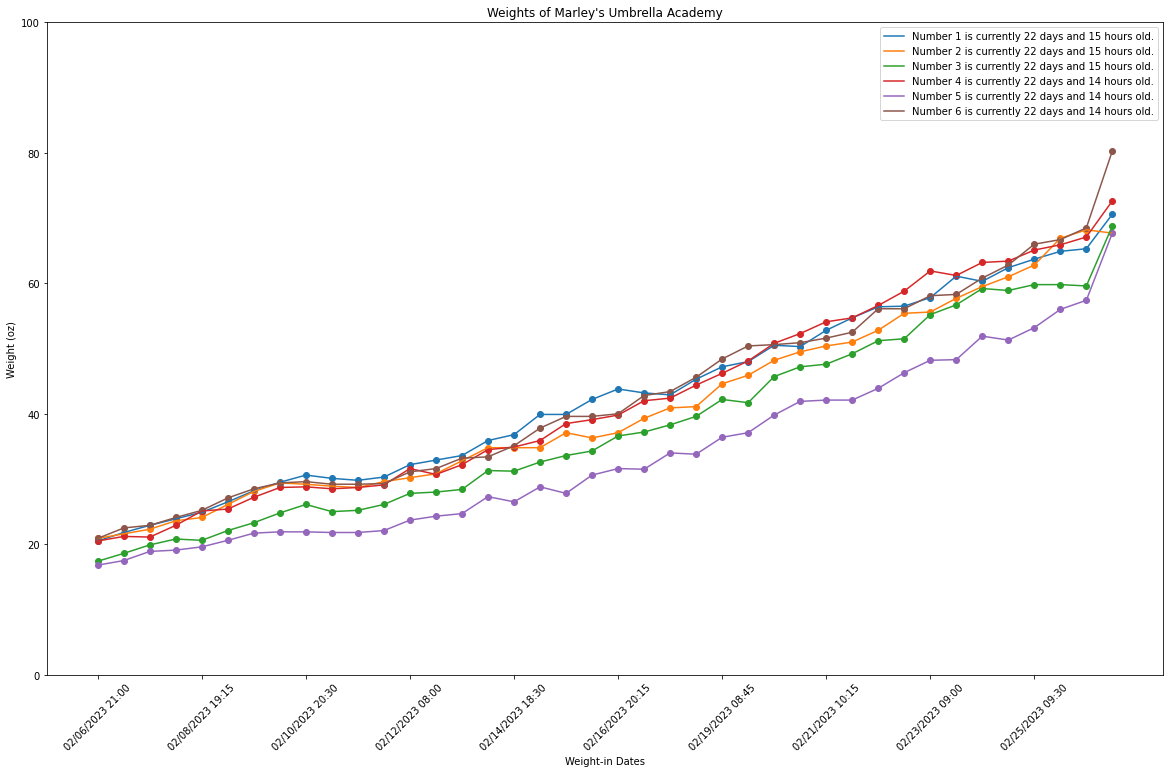

In [5]:
# Get the weight-in dates and the weights for each puppy
dates = sheet.col_values(1)[2:]
weights = [sheet.col_values(i)[2:] for i in range(2, 8)]

# Convert the weight strings to floats
weights = [[float(w) for w in puppy_weights] for puppy_weights in weights]

# Plot the weights
fig, ax = plt.subplots(figsize=(20, 12))
for i in range(6):
    ax.scatter(dates, weights[i])
    ax.plot(dates, weights[i], 
            label=f"Number {i+1} is currently {age(pup_weights.iloc[1][i+1])}")

# Set axis info
ax.set_ylim(0, 100)
ax.set_xlabel("Weight-in Dates")
ax.set_ylabel("Weight (oz)")
ax.set_title("Weights of Marley's Umbrella Academy")
ax.legend()

# Set the x-axis ticks to every 4th date
ax.xaxis.set_ticks(dates[::4])

# Format the tick labels to be rotated
ax.xaxis.set_tick_params(rotation=45)

plt.show()

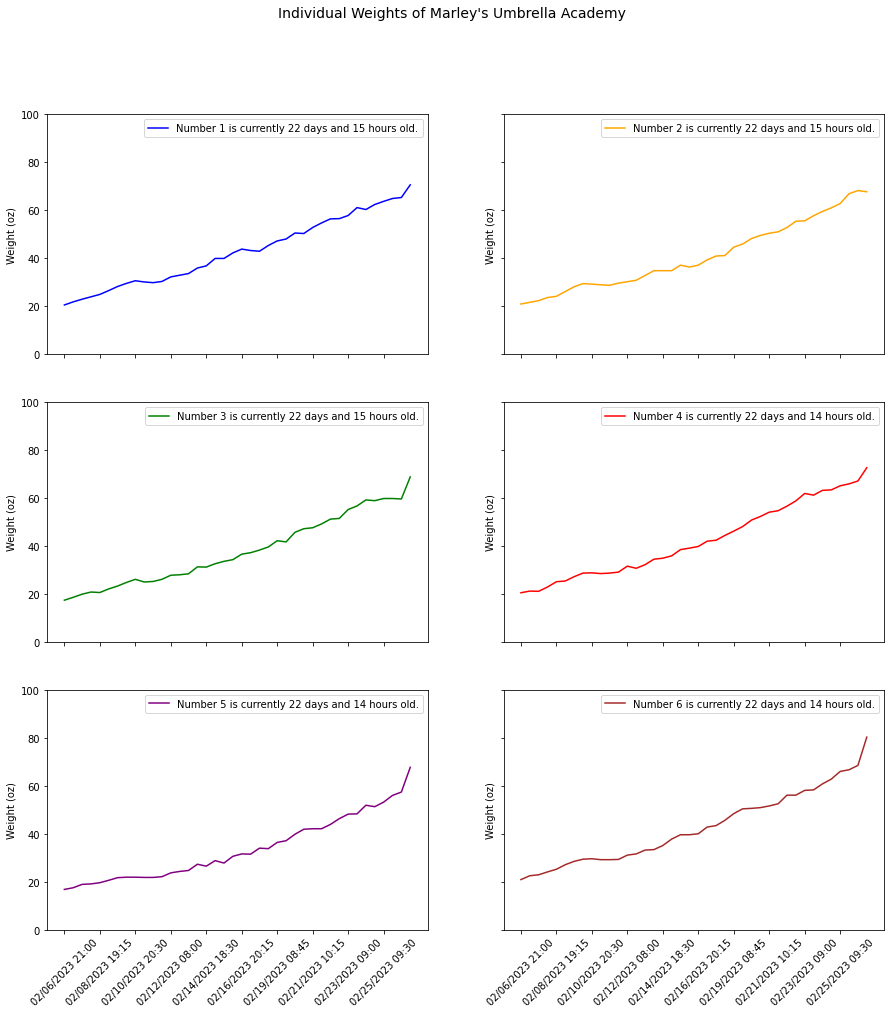

In [6]:
# Plot the weights as a scatter plot with a line connecting the data points
fig, axs = plt.subplots(3, 2, figsize=(15, 15), sharex=True, sharey=True)
fig.suptitle("Individual Weights of Marley's Umbrella Academy", fontsize=14)

# Define the colors for each puppy
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

for i in range(6):
    row = i // 2
    col = i % 2
    axs[row, col].plot(dates, weights[i], 
                       label=f"Number {i+1} is currently {age(pup_weights.iloc[1][i+1])}", 
                       color=colors[i])
    axs[row, col].set_ylim(0, 100)
    axs[row, col].set_ylabel("Weight (oz)")
    axs[row, col].legend()
    axs[row, col].xaxis.set_ticks(dates[::4])
    axs[row, col].tick_params(axis='x', rotation=45)

plt.show()

> # **Generic Adult Weight Prediction Formula:**

It is said that when a pup is 1 year old, it is double its own weight at 6 months old. For larger breeds, this is the generally accepted formula:



```
Adult_Weight = (Puppy_Weight / Puppy_Age_in_Weeks) * 52 
```
Following this logic, I have written the below to estimate each of Marley's Umbrella Academy's estimated adult weight. 


In [9]:
# Calculate age as string
def age_in_weeks(born):
  # Assign and filter as timezone the birth dates of each pup
  born = datetime.strptime(born, '%m/%d/%Y %H:%M')
  # Assign and format today's date and time as datetime with timezone = PST
  today = datetime.now(pytz.timezone('US/Pacific'))
  today_mod = today.strftime('%Y-%m-%d %H:%M:%S')
  today_final = datetime.strptime(today_mod, '%Y-%m-%d %H:%M:%S')
  # Calculate each pup's age by subtracting today from birthdate
  result = today_final - born

  # Extract only days and hours from result
  weeks = result.days / 7
  return weeks

In [10]:
# Function to get adult weight based on each pup's current age and weight
def get_adult_weight(pup_weights):
    adult_weights = []
    # Loop through each of the columns dedicated to each pup's weight, 
    # getting only the latest weight and calculate adult weight
    for i in range(1, 7):
        pup_weight_oz = float(pup_weights.iloc[-1][i])
        pup_age_weeks = age_in_weeks(pup_weights.iloc[1, i])
        adult_weight_oz = (pup_weight_oz / pup_age_weeks) * 52
        adult_weight_lbs = round(adult_weight_oz / 16)
        adult_weights.append(adult_weight_lbs)
    return adult_weights

adult_weights = get_adult_weight(pup_weights)

In [11]:
# For loop to print the estimated weight for each pup in a list
for i in range(len(adult_weights)):
  print(f"Number {i+1} is estimated to be about {adult_weights[i]} lbs when it is 1 year old.")

Number 1 is estimated to be about 73 lbs when it is 1 year old.
Number 2 is estimated to be about 70 lbs when it is 1 year old.
Number 3 is estimated to be about 71 lbs when it is 1 year old.
Number 4 is estimated to be about 75 lbs when it is 1 year old.
Number 5 is estimated to be about 70 lbs when it is 1 year old.
Number 6 is estimated to be about 83 lbs when it is 1 year old.


## Below is still a work in progress

> # **Linear Regression Prediction for Adult Weight**